In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [82]:
import pandas as pd 
import numpy as np 


In [83]:
df=pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

In [84]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [85]:
li=df.label.unique().tolist()

In [86]:
dist={li[i]:i for i in range(len(li))} 

In [87]:
dist

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [88]:
df.label.replace(dist,inplace=True)

In [89]:
x=df 
y=df.label

In [90]:
del x['label'] 

In [91]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [92]:
import matplotlib.pyplot as pt

In [93]:
li

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

<BarContainer object of 2200 artists>

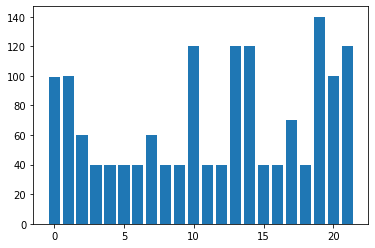

In [94]:
pt.bar(y,x['N'])

<BarContainer object of 2200 artists>

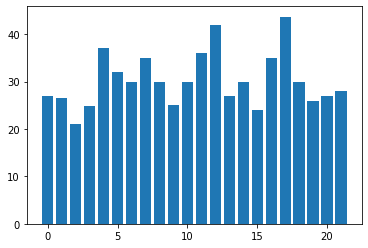

In [95]:
pt.bar(y,x.temperature)

In [97]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,train_size=0.8)

In [98]:
from sklearn import tree 
from sklearn import svm

In [101]:
mod1=tree.DecisionTreeClassifier()
mod1.fit(xtr,ytr)

DecisionTreeClassifier()

In [102]:
mod2=svm.SVC()
mod2.fit(xtr,ytr)

SVC()

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(mod1.predict(xte),yte)

0.990909090909091

In [107]:
accuracy_score(mod2.predict(xte),yte)

0.9818181818181818